In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import pmdarima as pm
import matplotlib.dates as mdates

In [2]:
# Define the file path
file_path_cluster = 'Data/Model Data/'

# Create an empty list
data_list = []

# Iterate through all files in the "Model Data" folder to store the dataframes
for i in range(10):
    cluster_data = pd.read_csv(file_path_cluster + f'cluster_{i}_data.csv')
    data_list.append(cluster_data)


In [3]:
# Create an empty dictionary
sarima_results = {}

# Iterate through all dataframes to find the best SARIMA parameters
for i, data in enumerate(data_list):
    # Store the Pickups Per Hour
    pickups_per_hour = data['Pickups Per Hour']

    # Fit the SARIMA model using auto_arima
    model = pm.auto_arima(pickups_per_hour, seasonal=True, m=7, trace=True)

    # Get the best parameters
    best_params = model.get_params()

    # Store the model and best parameters in the dictionary
    sarima_results[f'cluster_{i}_model'] = {
        'model': model
    }


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1541.748, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1325.628, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1446.720, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1539.798, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1542.750, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1262.416, Time=0.26 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1446.923, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1264.051, Time=0.42 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1263.957, Time=0.39 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1406.153, Time=0.31 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1266.197, Time=0.77 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1265.912, Time=0.21 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=1

In [4]:
# Create a dictionary to store the predictions
predictions_dict = {}

# Iterate through the sarima_results dictionary
for cluster, result in sarima_results.items():
    # Get the stored model for the current cluster
    stored_model = result['model']

    # Get the data for the current cluster
    cluster_data = data_list[int(cluster.split('_')[1])]

    # Set 'Date' as the index for the current cluster data
    cluster_data.set_index('Date', inplace=True)

    # Split the data into train and test sets
    train_data, test_data = train_test_split(cluster_data['Pickups Per Hour'], test_size=0.2, shuffle=False)

    # Train the SARIMA model using the stored parameters
    model = SARIMAX(train_data, order=stored_model.order, seasonal_order=stored_model.seasonal_order)
    model_fit = model.fit()

    # Store the trained model in the sarima_results dictionary
    sarima_results[cluster]['trained_model'] = model_fit

    # Make predictions on the test set
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Store the predictions in the predictions dictionary
    predictions_dict[cluster] = predictions

# Print the predictions
for cluster, predictions in predictions_dict.items():
    print(f"Predictions for {cluster}: {predictions}")


c:\Users\schwe\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\schwe\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\schwe\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\schwe\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Predictions for cluster_0_model: 2014-08-25     75.296171
2014-08-26     77.575602
2014-08-27     82.142136
2014-08-28     86.411046
2014-08-29     95.145905
2014-08-30    116.212271
2014-08-31     92.299639
2014-09-01     73.588582
2014-09-02     77.946836
2014-09-03     83.646565
2014-09-04     88.533360
2014-09-05     97.587217
2014-09-06    118.775509
2014-09-07     95.047127
2014-09-08     76.455787
2014-09-09     80.831575
2014-09-10     86.530063
2014-09-11     91.410402
2014-09-12    100.439709
2014-09-13    121.561024
2014-09-14     97.912539
2014-09-15     79.383422
2014-09-16     83.745262
2014-09-17     89.425219
2014-09-18     94.289604
2014-09-19    103.289203
2014-09-20    124.340879
2014-09-21    100.770439
2014-09-22     82.302469
2014-09-23     86.649925
2014-09-24     92.311146
2014-09-25     97.159485
2014-09-26    106.129393
2014-09-27    127.111616
2014-09-28    103.618941
2014-09-29     85.211900
2014-09-30     89.545014
Freq: D, Name: predicted_mean, dtype: floa

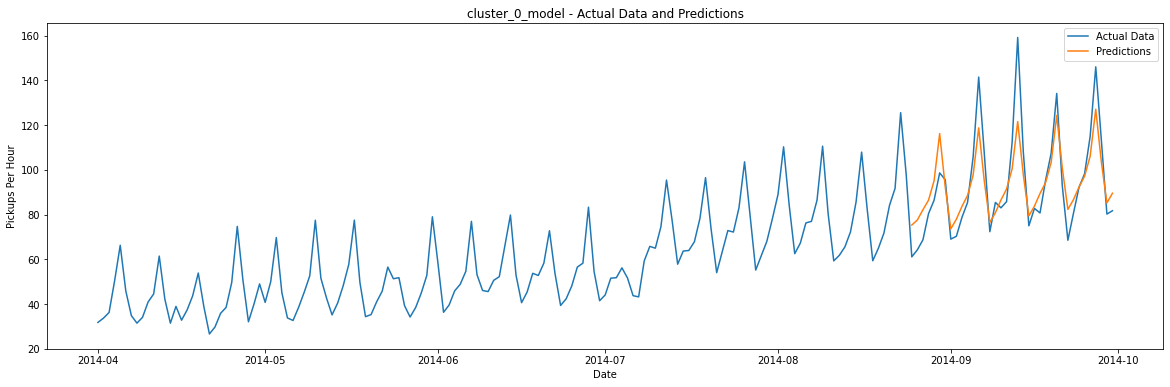

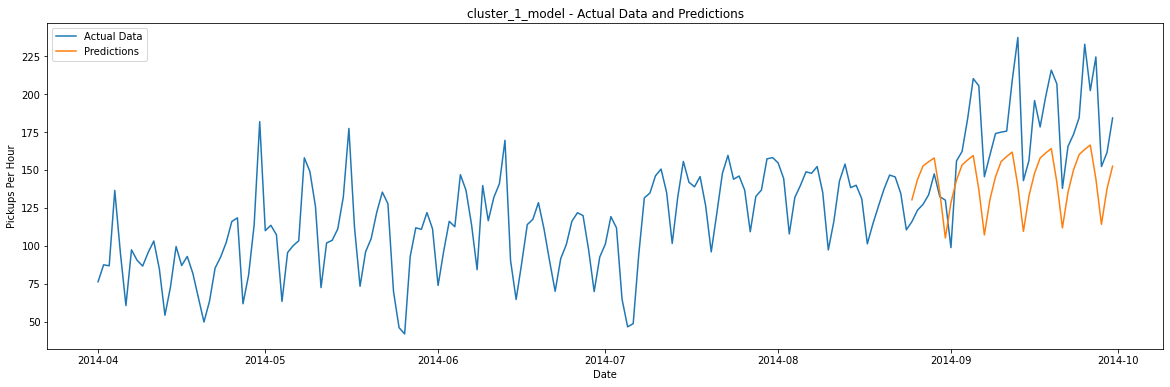

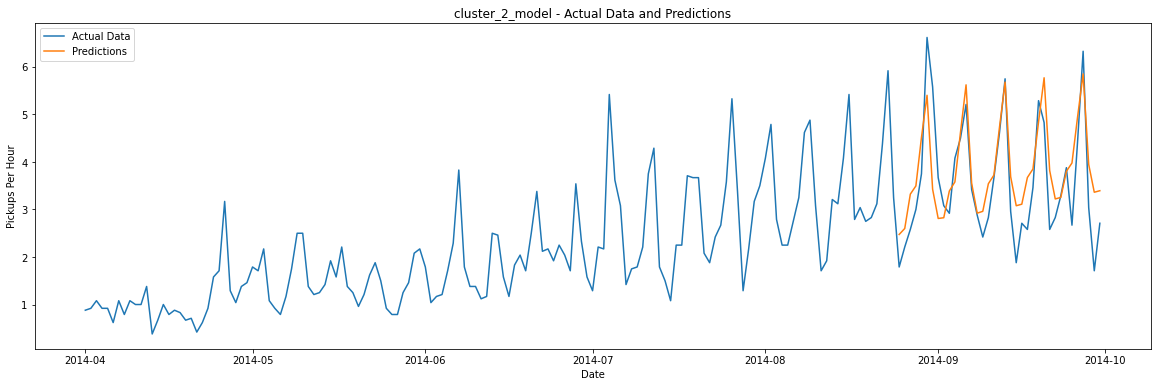

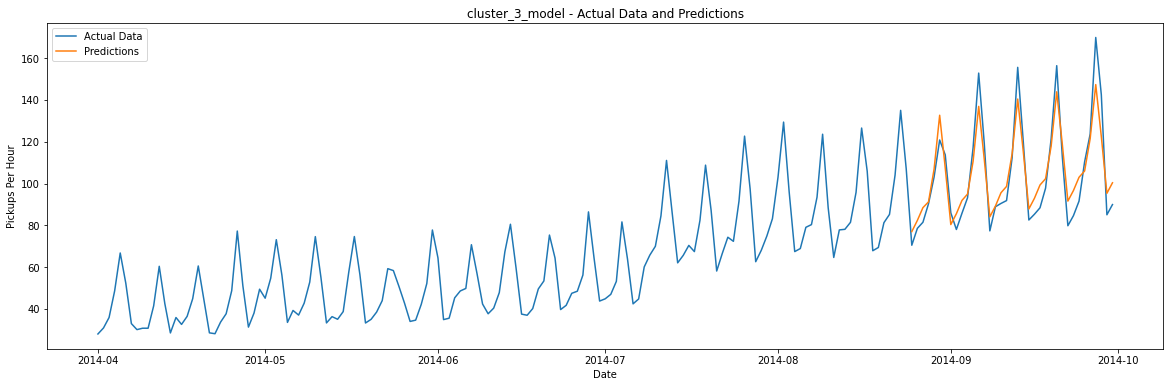

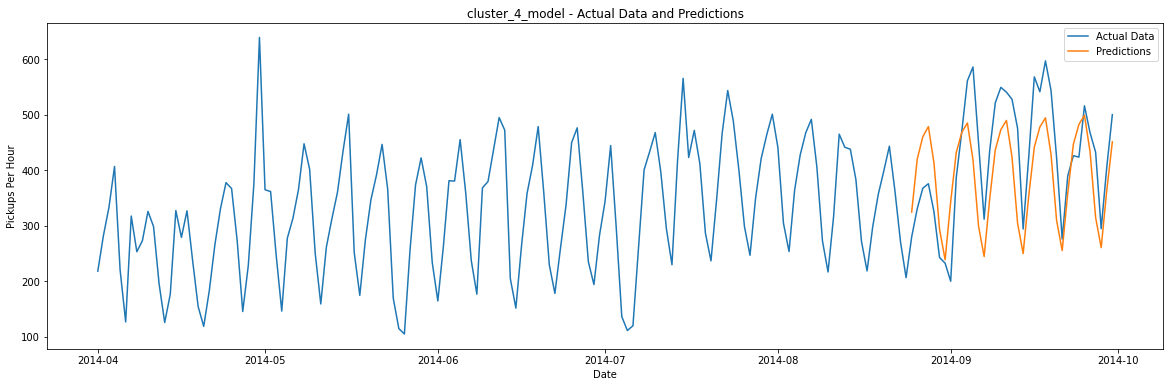

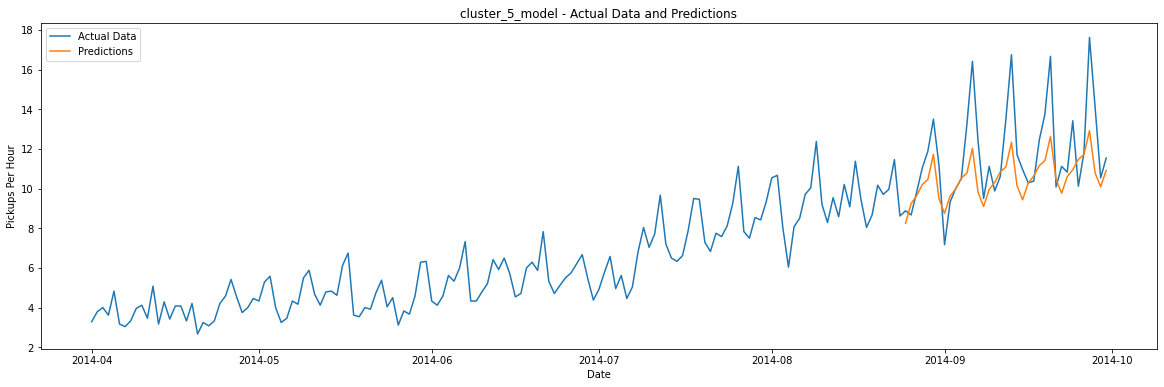

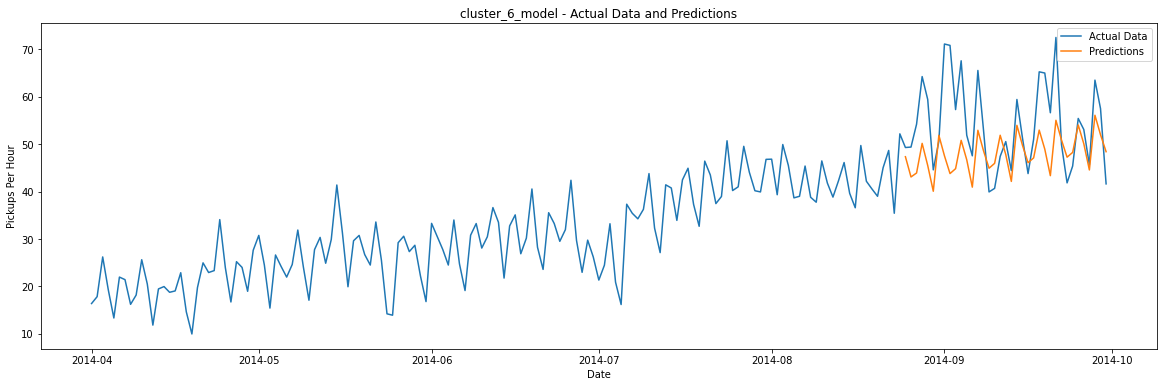

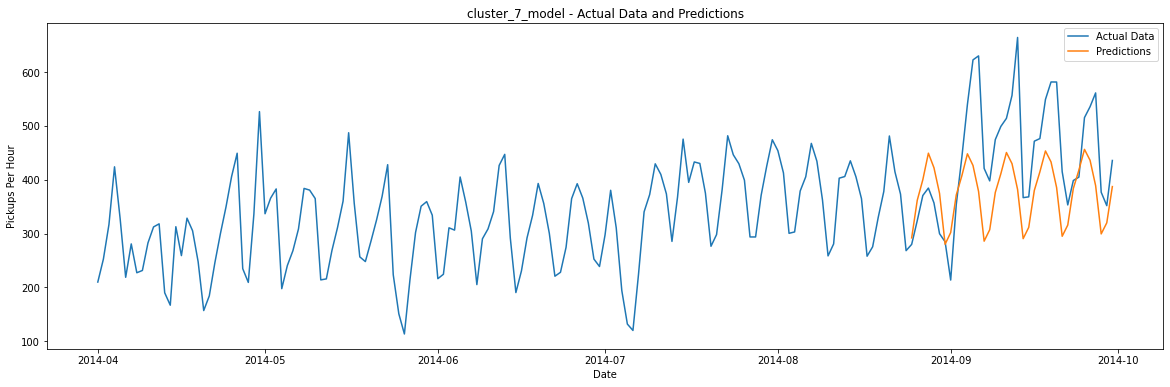

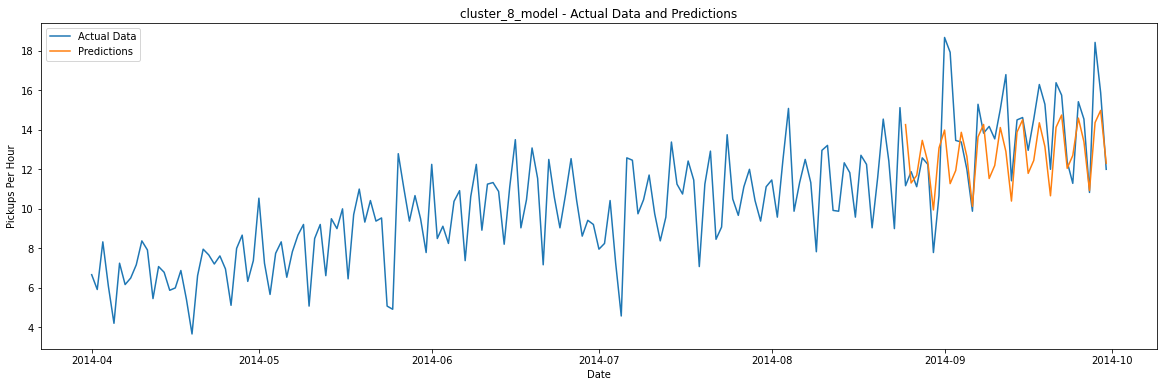

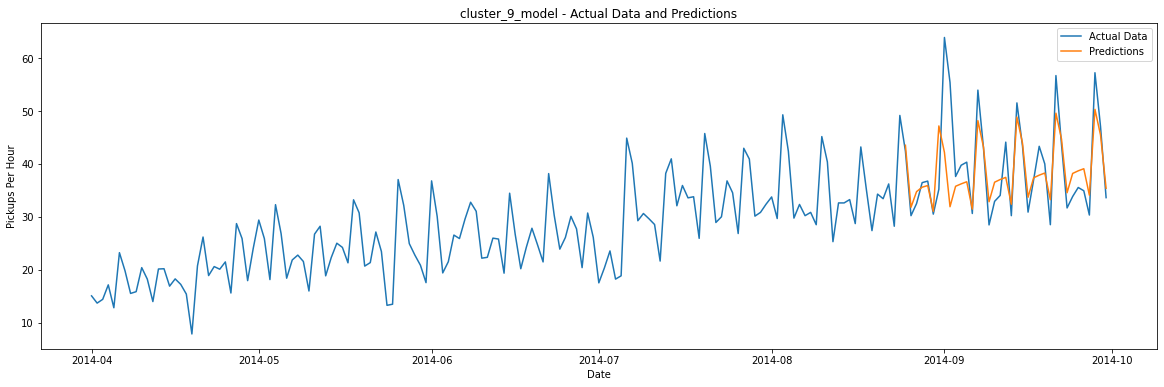

In [6]:
# Iterate through the cluster dictionary
for cluster, predictions in predictions_dict.items():
    # Get the actual data for the current cluster
    cluster_data = data_list[int(cluster.split('_')[1])]

    # Convert the index to datetime type
    cluster_data.index = pd.to_datetime(cluster_data.index)

    # Convert datetime values to numerical representation
    x_values = mdates.date2num(cluster_data.index)

    # Plot the actual data and predictions
    plt.figure(figsize=(20, 6))
    plt.plot(x_values, cluster_data['Pickups Per Hour'], label='Actual Data')
    plt.plot(x_values[-len(predictions):], predictions, label='Predictions')

    # Set the x-axis tick format to display only the month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    plt.xlabel('Date')
    plt.ylabel('Pickups Per Hour')
    plt.title(f'{cluster} - Actual Data and Predictions')
    plt.legend()
    plt.show()


In [8]:
predictions_dict = {}

# Iterate through the cluster dictionary
for cluster, result in sarima_results.items():
    # Get the trained model for the current cluster
    trained_model = result['trained_model']

    # Make predictions on the test set
    predictions = trained_model.predict(start=len(train_data) + len(test_data) - 1, end=274)

    # Store the new predictions in the predictions dictionary
    predictions_dict[cluster] = predictions


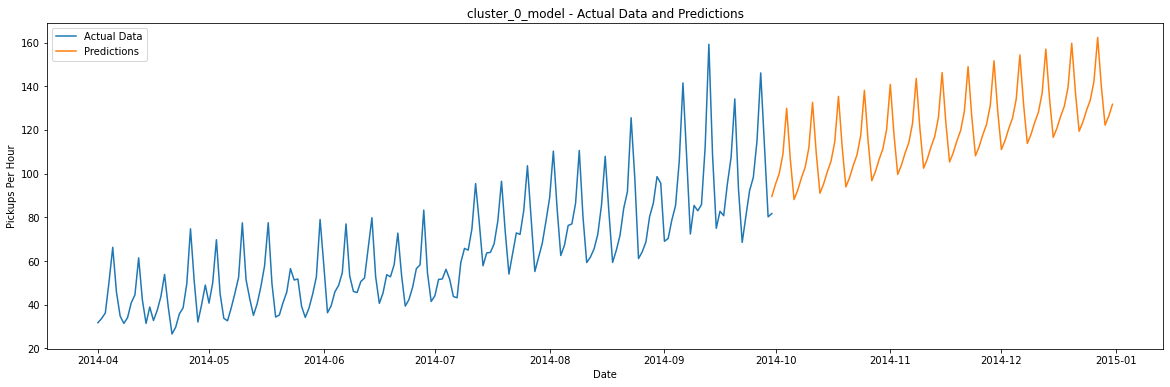

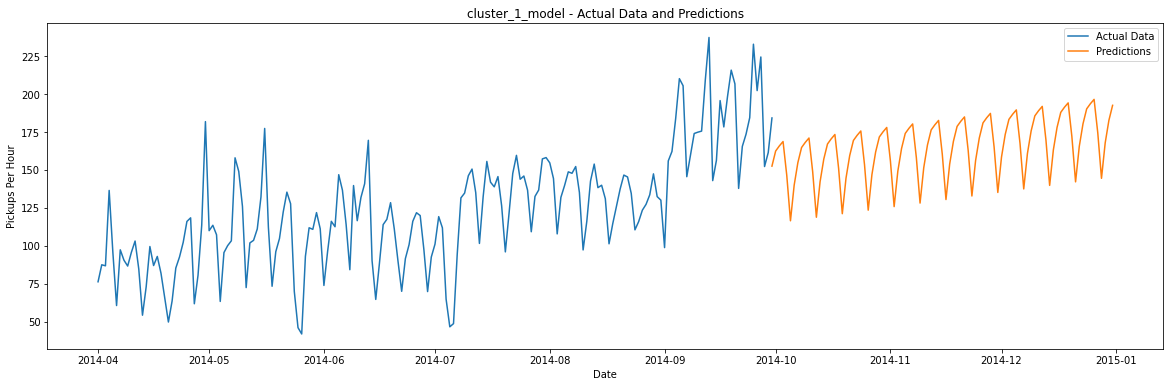

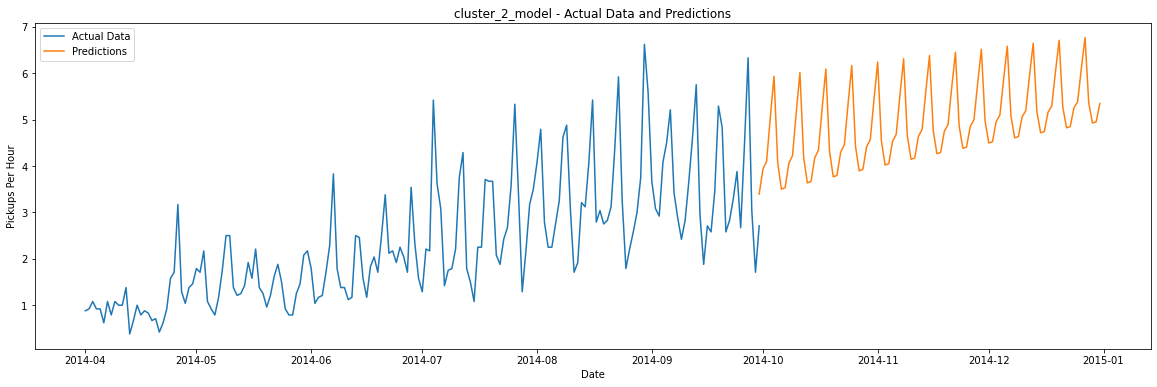

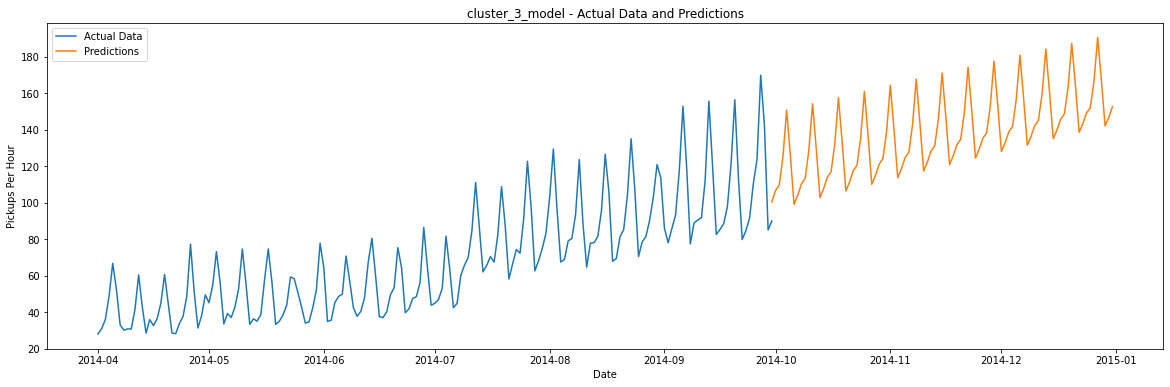

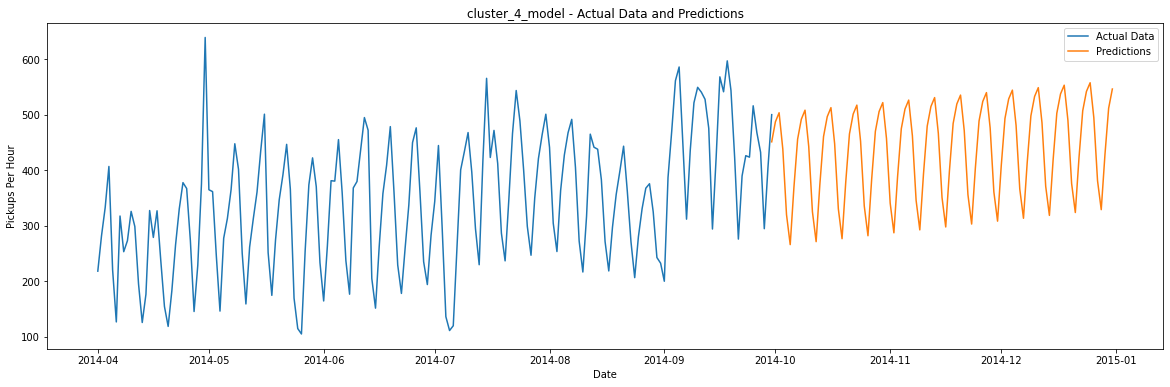

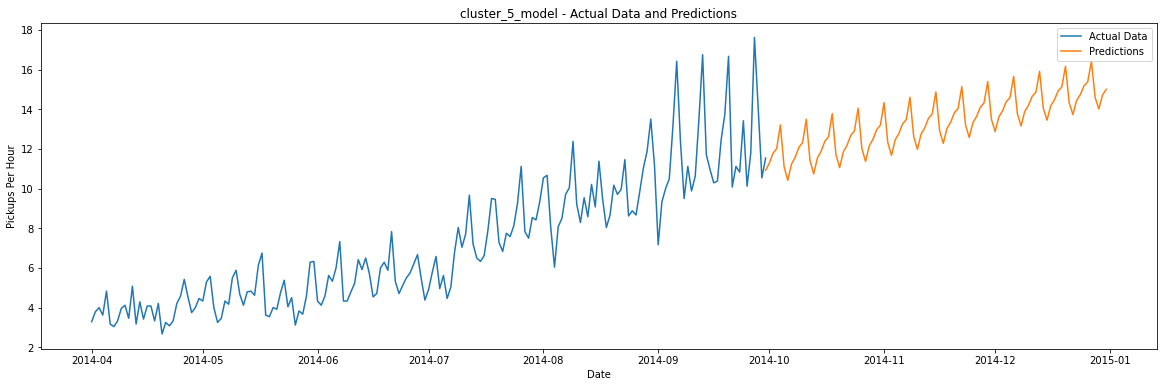

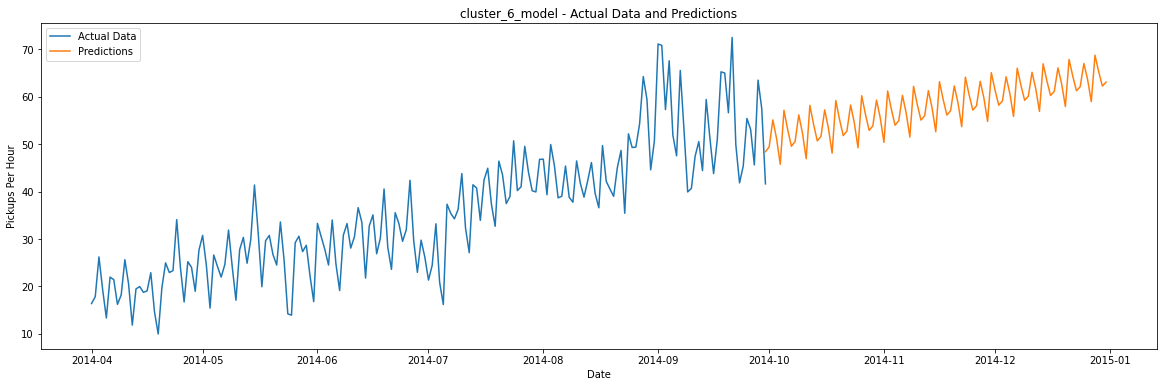

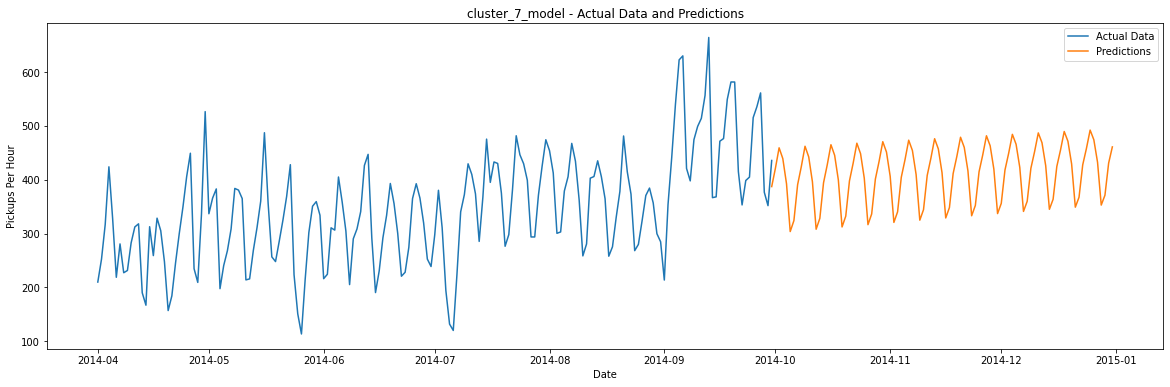

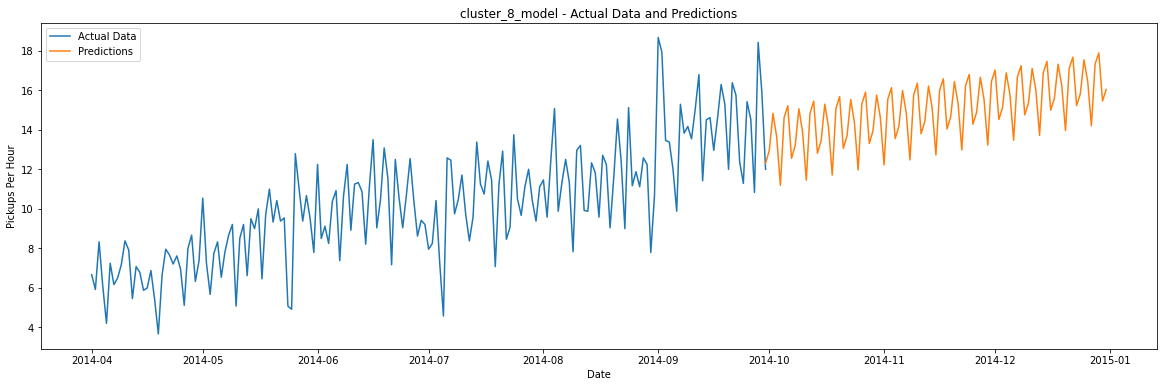

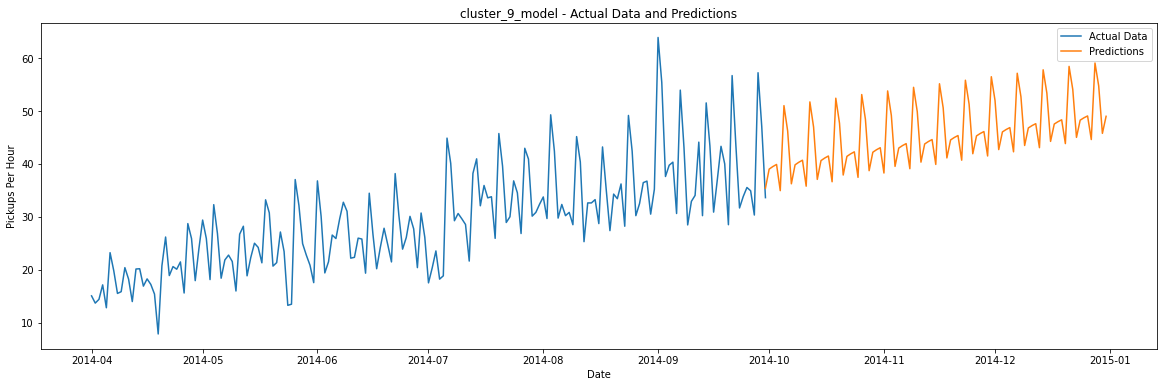

In [10]:
# Iterate through the cluster dictionary
for cluster, predictions in predictions_dict.items():
    # Get the actual data for the current cluster
    cluster_data = data_list[int(cluster.split('_')[1])]

    # Plot the actual data
    plt.figure(figsize=(20, 6))
    plt.plot(cluster_data.index, cluster_data['Pickups Per Hour'], label='Actual Data')

    # Plot the predictions
    plt.plot(predictions.index, predictions.values, label='Predictions')

    plt.xlabel('Date')
    plt.ylabel('Pickups Per Hour')
    plt.title(f'{cluster} - Actual Data and Predictions')
    plt.legend()
    plt.show()
